In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

### Simulation

We use the same simulation from Tutorial 1 with a different propagation module.

In [2]:
sim = rw.Simulation()

nr_particles = 10**0
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 10**15 # eV
source = rw.PointSourceIsotropicPhi(energy, source_pos, nr_particles)
sim.add_source(source)

nr_steps = 5*10**1
step_size = 4*10**10 # [m]
diffusion_coefficient = 5*10**18 # [m^2/s]
speed_of_light = 3*10**8 # [m/s]
mfp_iso = 3*diffusion_coefficient/speed_of_light
mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
propagator = rw.IsotropicPropagator(mfp, nr_steps, step_size)
sim.add_propagator(propagator)

substeps = [False, False, True] # observe only steps (no substeps)
#min_step = 1
#max_step = nr_steps
#nr_obs_steps = 200
#observer = rw.TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)
spheres = [100664454320]
observer = rw.SphericalObserver(substeps, spheres)
sim.add_observer(observer)

%time sim.run_simulation()
sim.save_data('data/data_tut_5')

start simulation
Propagator initialized
Observer initialized
pos:  [0. 0. 0.]
pos:  [2.309401e+10 0.000000e+00 0.000000e+00]
pos:  [2.309401e+10 2.309401e+10 0.000000e+00]
pos:  [2.309401e+10 2.309401e+10 2.309401e+10]
check in sphere!
pos:  [2.309401e+10 2.309401e+10 2.309401e+10] , pos_prev:  [2.309401e+10 2.309401e+10 2.309401e+10]
radius:  39999998641.59892 , r_s:  100664451072.0 , radius_prev: 39999998641.59892
pos:  [2.309401e+10 2.309401e+10 2.309401e+10]
pos:  [4.618802e+10 2.309401e+10 2.309401e+10]
pos:  [4.618802e+10 0.000000e+00 2.309401e+10]
pos:  [4.618802e+10 0.000000e+00 4.618802e+10]
check in sphere!
pos:  [4.618802e+10 0.000000e+00 4.618802e+10] , pos_prev:  [4.618802e+10 0.000000e+00 4.618802e+10]
radius:  65319724255.958405 , r_s:  100664451072.0 , radius_prev: 65319724255.958405
pos:  [4.618802e+10 0.000000e+00 4.618802e+10]
pos:  [2.309401e+10 0.000000e+00 4.618802e+10]
pos:  [ 2.309401e+10 -2.309401e+10  4.618802e+10]
pos:  [ 2.309401e+10 -2.309401e+10  6.928203e

ValueError: Length mismatch: Expected axis has 0 elements, new values have 10 elements

In [3]:
df = pd.DataFrame(sim.data[1:])
sim.observer.get_description()
df

Description Observer:
                The observer defines the conditions for when to write data to the output.

observer tpye: SphericalObserver
spheres:  [-1.0000000e+00  1.0066445e+11]
steps [0:10]:  []
steps [-11:-1]:  []
nr steps:  0
substeps:  [False False  True]
all_steps:  False


,0,1,2,3,4,5,6,7,8,9
0,0.0,2.0,1.200000e+11,6.928203e+10,-2.309401e+10,6.928203e+10,5.057586,4.096986,1.006645e+11,2.0
1,0.0,3.0,1.600000e+11,9.237604e+10,0.000000e+00,9.237604e+10,5.057586,4.096986,1.006645e+11,2.0
2,0.0,4.0,2.000000e+11,6.928203e+10,-2.309401e+10,1.154700e+11,5.057586,4.096986,1.006645e+11,2.0
3,0.0,5.0,2.400000e+11,4.618802e+10,-4.618802e+10,9.237604e+10,5.057586,4.096986,1.006645e+11,2.0
4,0.0,6.0,2.800000e+11,6.928203e+10,-6.928203e+10,1.154700e+11,5.057586,4.096986,1.006645e+11,2.0
5,0.0,7.0,3.200000e+11,4.618802e+10,-4.618802e+10,1.385641e+11,5.057586,4.096986,1.006645e+11,2.0
6,0.0,8.0,3.600000e+11,2.309401e+10,-6.928203e+10,1.154700e+11,5.057586,4.096986,1.006645e+11,2.0
7,0.0,9.0,4.000000e+11,4.618802e+10,-4.618802e+10,9.237604e+10,5.057586,4.096986,1.006645e+11,2.0
8,0.0,10.0,4.400000e+11,2.309401e+10,-6.928203e+10,6.928203e+10,5.057586,4.096986,1.006645e+11,2.0
9,0.0,11.0,4.800000e+11,0.000000e+00,-9.237604e+10,4.618802e+10,5.057586,4.096986,1.006645e+11,2.0


### Analysis

init statistics plotting class


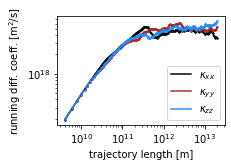

diffusion coefficients computed between 2.06e+11m and 2.00e+13m with 100 data points
kappa_{xx}: 4.48e+18 m²/s +- 4.28e+17 m²/s
kappa_{yy}: 4.92e+18 m²/s +- 5.84e+17 m²/s
kappa_{zz}: 4.83e+18 m²/s +- 6.95e+17 m²/s


In [3]:
df = pd.read_pickle("data/data_tut_5.pkl")

sta = rw.Statistics(df)
isotropic = True # diffusion is isotropic
errors = False # don't show error bars
df_kappas = sta.plot_diffusion_coefficients(isotropic, errors, None)
